# PUMP IT

Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

An interactive course exploring this dataset is currently offered by DataCamp.com!

Competition End Date: Jan. 28, 2017, 11:59 p.m.

This competition is for learning and exploring, so the deadline may be extended in the future.


* [Git Hub Repo](https://github.com/msampathkumar/datadriven_pumpit)
* [Git Hub Report](https://github.com/msampathkumar/datadriven_pumpit/blob/master/capstone_proposal.mdown)
* [Features Details](https://www.drivendata.org/competitions/7/page/25/)



## Global Imports

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(69572)

%matplotlib inline

%load_ext writeandexecute

# plt.figure(figsize=(120,10))

# plot figsize
small = (4,3)
mid = (10, 8)
large = (12, 8)

The writeandexecute extension is already loaded. To reload it, use:
  %reload_ext writeandexecute


## Custom Functions

### MarkUP Fns

In [ ]:
from __future__ import absolute_import
from IPython.core.getipython import get_ipython
from IPython.core.magic import (Magics, magics_class,  cell_magic)
import sys
from StringIO import StringIO
from markdown import markdown
from IPython.core.display import HTML
 
@magics_class
class MarkdownMagics(Magics):
 
    @cell_magic
    def asmarkdown(self, line, cell):
        buffer = StringIO()
        stdout = sys.stdout
        sys.stdout = buffer
        try:
            exec(cell, locals(), self.shell.user_ns)
        except:
            sys.stdout = stdout
            raise
        sys.stdout = stdout
        return HTML("<p>{}</p>".format(markdown(buffer.getvalue(), extensions=['markdown.extensions.extra'])))
        return buffer.getvalue() + 'test'
 
get_ipython().register_magics(MarkdownMagics)

### DataFrame Value Counts

In [ ]:
import pandas as pd

def raw_markup_value_counts(dataframe, max_print_value_counts=30, show_plots=False):
    '''
    prints value counts of each feature in data frame
    '''
    mydf = pd.DataFrame.copy(dataframe)
    i = 0
    raw_markup_data = []
    pp = raw_markup_data.append
    pp('''|Col ID|Col Name|UniqCount|Col Values|UniqValCount|''')
    pp('''|------|--------|---------|----------|------------|''')
    for col in mydf.dtypes.index:
        i += 1
        sam = mydf[col]
        tmp = len(sam.value_counts())
        if tmp < max_print_value_counts:
            flag = True
            for key, val in dict(sam.value_counts()).iteritems():
                if flag:
                    pp('|%i|%s|%i|%s|%s|' % (
                            i, col, len(sam.value_counts()), key, val))
                    flag = False
                else:
                    pp('||-|-|%s|%s|' % (key, val))
            if show_plots:
                plt.figure(i)
                ax = sam.value_counts().plot(kind='barh', figsize=(12, 5))
                _ = plt.title(col.upper())
                _ = plt.xlabel('counts')
        else:
            pp('|%i|%s|%i|||' % (i, col, len(sam.value_counts())))
    return raw_markup_data

#### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

import itertools

from __future__ import division

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

    
# def confusion_maxtrix_stuff(y_test, y_pred, class_names=RAW_y.status_group.value_counts().keys()):
def confusion_maxtrix_stuff(y_test, y_pred, class_names):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

## Import & Explore Data

In [75]:
RAW_X = pd.read_csv('traning_set_values.csv', index_col='id')
RAW_y = pd.read_csv('training_set_labels.csv', index_col='id')
test_submission = pd.read_csv('test_set_values.csv', index_col='id')

In [ ]:
RAW_X.describe()

In [ ]:
RAW_X.head().T

In [ ]:
RAW_X.dtypes[RAW_X.dtypes == object]

In [ ]:
%%asmarkdown

# show me the graphs
tmp = raw_markup_value_counts(RAW_X, 10, True)

## Pre Processing



1. Start_date

    Converting start_date from object type to integer, `2012-10-01` ==> 20121001

2. Longitude & Latitude

    Thirteen decimal places will pin down the location to 111,111/10^13 = about 1 angstrom, around half the thickness of a small atom.
    The sign tells us whether we are north or south, east or west on the globe.
    * A nonzero hundreds digit tells us we're using longitude, not latitude!
    * The tens digit gives a position to about 1,000 kilometers. It gives us useful information about what continent or ocean we are on.
    * The units digit (one decimal degree) gives a position up to 111 kilometers (60 nautical miles, about 69 miles). It can tell us roughly what large state or country we are in.
    * The first decimal place is worth up to 11.1 km: it can distinguish the position of one large city from a neighboring large city.
    * The second decimal place is worth up to 1.1 km: it can separate one village from the next.
    * The third decimal place is worth up to 110 m: it can identify a large agricultural field or institutional campus.
    * The fourth decimal place is worth up to 11 m: it can identify a parcel of land. It is comparable to the typical accuracy of an uncorrected GPS unit with no interference.

    As we dont need a higher accuracy than 4 digits, we are going trim to 4 digits.


Source: [Link](http://gis.stackexchange.com/questions/8650/measuring-accuracy-of-latitude-and-longitude)

#### DateTime to Int

In [76]:
from datetime import datetime
date_format = "%Y-%m-%d"
a = datetime.strptime('2000-01-01', date_format)
b = datetime.strptime('2013-01-28', date_format)
delta = b - a
print delta.days # that's it

4776


In [77]:
RAW_X.date_recorded.head()

id
69572    2011-03-14
8776     2013-03-06
34310    2013-02-25
67743    2013-01-28
19728    2011-07-13
Name: date_recorded, dtype: object

In [78]:
date_format = "%Y-%m-%d"
a_start_date = datetime.strptime('2000-01-01', date_format)

RAW_X.date_recorded = RAW_X.date_recorded.map(lambda x: (datetime.strptime(str(x), date_format) - a_start_date).days)

#### Logititude and Latitude

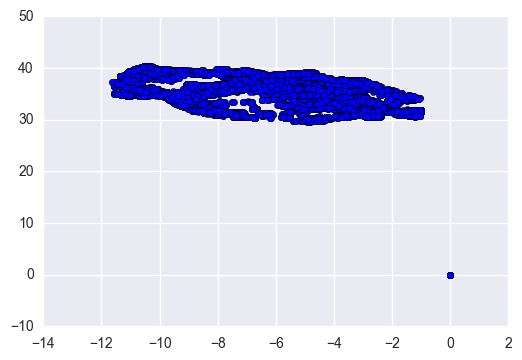

In [79]:
_ = plt.scatter(RAW_X[u'latitude'], RAW_X[u'longitude'])

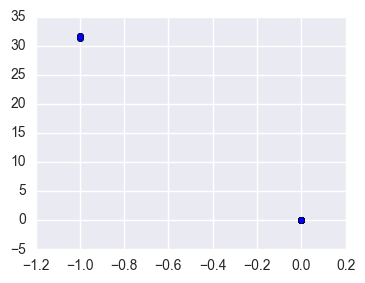

In [80]:
plt.figure(figsize=small)
_ = plt.scatter(RAW_X[u'latitude'][RAW_X.latitude >= -1.0], RAW_X[u'longitude'][RAW_X.latitude >= -1.0])

In [81]:
RAW_X[u'latitude'][RAW_X[u'latitude'] >= -1.0].head()

id
6091    -2.000000e-08
32376   -2.000000e-08
72678   -2.000000e-08
56725   -2.000000e-08
13042   -2.000000e-08
Name: latitude, dtype: float64

In [82]:
print 'Outliers Count:', len(RAW_X[u'latitude'][RAW_X[u'latitude'] >= -1.0])
print 'Outliers Count:', len(RAW_X[u'longitude'][RAW_X[u'longitude'] <= 1.0])

Outliers Count: 1819
Outliers Count: 1812


In [83]:
_ = np.mean(RAW_X[u'latitude'][RAW_X.latitude < -1.0].values)
RAW_X.loc[RAW_X.latitude >= -1.0, u'latitude'] = _

In [84]:
_ = np.mean(RAW_X[u'longitude'][RAW_X[u'longitude'] > 1.0].values)
RAW_X.loc[RAW_X[u'longitude'] <= 1.0, u'longitude'] = _

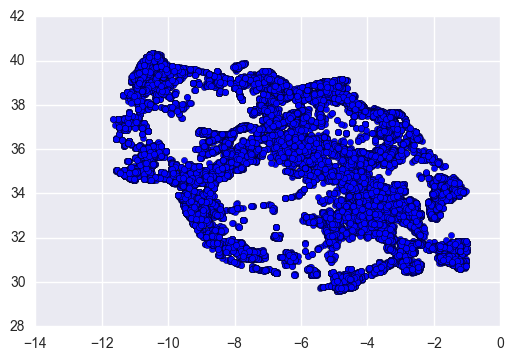

In [85]:
_ = plt.scatter(RAW_X[u'latitude'], RAW_X[u'longitude'])

In [86]:
# reducing geo location precision to 11 meters
RAW_X.longitude = RAW_X.longitude// 0.0001
RAW_X.latitude = RAW_X.latitude// 0.0001

#### Fixing Boolean Values

In [87]:
RAW_X.public_meeting = RAW_X.public_meeting == True
RAW_X.permit = RAW_X.permit == True

#### text issues

In [88]:
def text_transformation(name):
    if name:
        name = name.lower().strip()
        name = ''.join([i if 96 < ord(i) < 128 else ' ' for i in name])
        if 'and' in name:
            name = name.replace('and', ' ')
        while '  ' in name:
            name = name.replace('  ', ' ')
        return name.strip()
    return 

for col in RAW_X.dtypes[RAW_X.dtypes == object].index:
    aa = len(RAW_X[col].unique())
    RAW_X[col] = RAW_X[col].fillna('').apply( lambda x : text_transformation(x))
    bb = len(RAW_X[col].unique())
    if aa != bb:
        print col, aa, bb

funder 1898 1881
installer 2146 1867
wpt_name 37400 36717
subvillage 19288 19176
scheme_name 2697 2485


In [ ]:
RAW_X.head().T

In [ ]:
# setting a limit factor of 100 categorical values are allowed

MAX_CATEGORICAL_GROUPS_LIMIT = 150

icols = {}
for col in RAW_X.dtypes[RAW_X.dtypes == object].index:
    tmp = len(RAW_X[col].unique())
    if tmp > MAX_CATEGORICAL_GROUPS_LIMIT:
        icols[col] = tmp

icols

In [ ]:
from collections import Counter

In [ ]:
funder_dict =  Counter(RAW_X.funder)
tmp = funder_dict.keys()
tmp.sort()

In [ ]:
%pprint on

In [ ]:
import pickle

In [ ]:
pickle.dump(funder_dict, open('funder.pkl', 'w'))

In [ ]:
tmp2 = funder_dict.keys()

In [ ]:
tmp2 = Counter(tmp).values()
tmp2.sort()
tmp2 = np.array(tmp2)
_ = plt.plot(tmp2)

#### Cols vs Uniq distribution

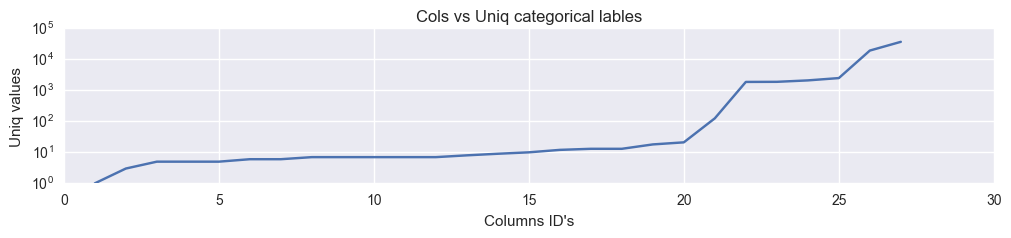

In [89]:
x = []
y = []
i = 0
for col in RAW_X.dtypes[RAW_X.dtypes == object].index:
    # print col, len(RAW_X[col].unique())
    i += 1
    x.append(i)
    y.append(len(RAW_X[col].unique()))


y.sort()

plt.figure(figsize=(12, 2))
plt.title('Cols vs Uniq categorical lables')
plt.xlabel('Columns ID\'s')
plt.ylabel('Uniq values')
_ = plt.semilogy(x, np.array(y))

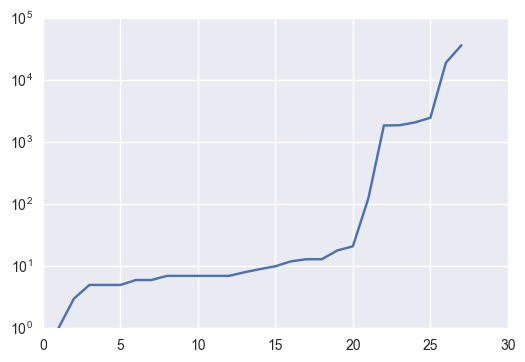

In [90]:
_ = plt.semilogy(x, np.array(y))

In [91]:
y = np.array(sorted(y))

(array([  1.,  12.,   7.,   0.,   1.,   0.,   0.,   4.,   0.,   2.]),
 array([  0.  ,   1.05,   2.1 ,   3.15,   4.2 ,   5.26,   6.31,   7.36,
          8.41,   9.46,  10.51]),
 <a list of 10 Patch objects>)

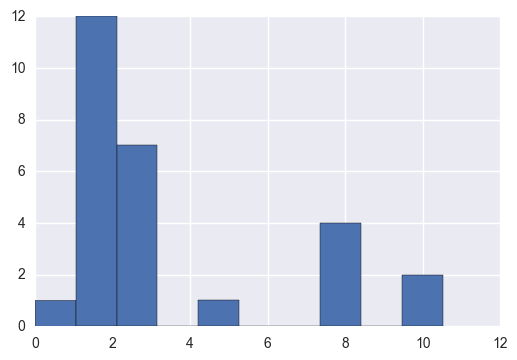

In [92]:
plt.hist(np.log(y))

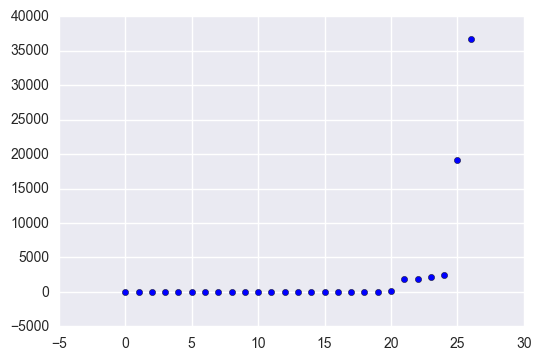

In [93]:
_ = plt.scatter(np.arange(len(y)), y)

#### Boolean Column

In [94]:
RAW_X.public_meeting = RAW_X.public_meeting == True
RAW_X.permit = RAW_X.permit == True

### Understanding distribution of data

In [ ]:
y = np.log(dict(RAW_X.installer.value_counts()).values())

print 'Total no.of unique values', len(y)
print 'Max', y.max()
print 'Min', y.min()
print 'Values more than 1', len(y[y > 0])

#_ = plt.plot(np.arange(len(y)), y)

In [ ]:
# discard all minor values
y1 = y[y > 0]

# find the max limt for accepting
print y1.mean(), y1.std()
# _ = plt.hist(y1)

print 'with restpect to mean, 2 standard deviation', y1.mean() + (2 * y1.std())

In [ ]:
y = np.log(dict(RAW_X.installer.value_counts()).values())

# Discard all values appeared only once.
y = y[y > 0]

y = y[y <= 5.13106006715]

print 'with restpect to mean, 2 standard deviation', y1.mean() + (2 * y1.std())

plt.hist(y)

In [ ]:
m = y1.mean()
s = y1.std()

for i in range(3):
    print m - (s * i), m + (s * i)

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.power(x, 2) # Effectively y = x**2
e = np.array([1.5, 2.6, 3.7, 4.6, 5.5])

plt.errorbar(x, y, e, linestyle='None', marker='^')

plt.show()

Finding closely matching words

In [ ]:
import difflib

tmp2 = difflib.get_close_matches('govern', tmp1, n=100, cutoff=0.66)
for each in tmp2:
    print '%s : %s' % (each, tmp[each])

## Vector Transformation

In [95]:
from collections import defaultdict
from sklearn import preprocessing

# http://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
d = defaultdict(preprocessing.LabelEncoder)

# Labels Fit
sam = pd.concat([RAW_X, test_submission]).apply(lambda x: d[x.name].fit(x))

# Labels Transform - Training Data
X = RAW_X.apply(lambda x: d[x.name].transform(x))

# Labels Transform - Submission Data
# test_submission = test_submission.apply(lambda x: d[x.name].transform(x))

#
le = preprocessing.LabelEncoder().fit(RAW_y)
y = le.transform(RAW_y[u'status_group'])


In [ ]:
# g = sns.PairGrid(X[:1000])
# g.map(plt.scatter);

### UniVariate Analysis

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [36]:
X.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,65,47,2341,1450,2436,34691,4427,42711,0,10,...,0,8,2,1,1,9,7,0,1,1
8776,0,309,1446,1459,1572,33155,36641,47357,0,13,...,2,8,2,2,2,6,3,1,1,1
34310,15,300,1802,746,2904,46097,28442,25046,0,14,...,5,8,2,1,1,0,1,1,2,1
67743,0,272,2708,323,2759,50060,423,47448,0,16,...,2,8,2,0,0,4,0,0,2,1
19728,0,104,1002,60,1159,18280,37667,45725,0,13,...,2,8,2,3,3,6,3,1,1,1


In [96]:
test = SelectKBest(score_func=chi2, k=30)
fit = test.fit(X, y)

In [97]:
np.set_printoptions(precision=2)
print(fit.scores_), len(fit.scores_)

[  7.49e+04   9.62e+03   2.44e+04   5.13e+05   1.10e+04   1.20e+06
   2.29e+05   6.31e+04   2.11e+02   8.30e+01   1.25e+04   5.76e+02
   1.70e+03   6.45e+02   2.97e+03   1.08e+03   5.16e+03   4.42e+01
   0.00e+00   4.06e+02   2.44e+05   1.31e+04   2.43e+04   3.45e+03
   4.67e+03   7.67e+03   1.64e+02   3.02e+01   8.66e+02   4.63e+02
   4.62e+00   4.23e+02   6.73e+02   6.73e+02   4.16e+02   5.39e+02
   3.95e+02   5.67e+03   4.47e+03] 39


In [98]:
col_importances = list(zip(fit.scores_, RAW_X.columns))
col_importances.sort(reverse=True)
selected_cols =  [_[-1] for _ in col_importances[:30] ]

In [100]:
features = pd.DataFrame(fit.transform(X))

In [101]:
features.columns = selected_cols

In [102]:
print len(X.columns), features.shape

39 (59400, 30)


In [118]:
features.shape, len(y)

((59400, 30), 21)

In [121]:
y = le.transform(RAW_y[u'status_group'])

'source'

## Test-Train Split

In [122]:
from sklearn.cross_validation import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=42, stratify=y)

In [105]:
# # X_train.boxplot()
# plt.figure(figsize=(12,10))
# _ = sns.boxplot(X_train)

# Model Training

## Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [125]:
clf = clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)

In [126]:
clf.feature_importances_

array([ 0.01,  0.05,  0.03,  0.05,  0.03,  0.08,  0.08,  0.06,  0.05,
        0.02,  0.01,  0.02,  0.03,  0.04,  0.03,  0.02,  0.02,  0.04,
        0.02,  0.02,  0.02,  0.02,  0.02,  0.01,  0.06,  0.07,  0.01,
        0.01,  0.03,  0.03])

In [127]:
cols_imp = list(zip(clf.feature_importances_, X_train.columns))

In [128]:
cols_imp.sort(key=lambda x: x[0])

In [129]:
cols_imp

[(0.0094768689213947412, 'quantity'),
 (0.012713306143829307, 'payment_type'),
 (0.013302616532518324, 'longitude'),
 (0.014051505202347686, 'source_type'),
 (0.014598967862723151, 'installer'),
 (0.015376033488194149, 'payment'),
 (0.016489721109935938, 'ward'),
 (0.01662944731385891, 'date_recorded'),
 (0.016988514475954682, 'subvillage'),
 (0.019297220250684064, 'lga'),
 (0.0202413264419656, 'quantity_group'),
 (0.023471996490709836, 'extraction_type_group'),
 (0.024126189211292177, 'waterpoint_type_group'),
 (0.024686597763998064, 'region_code'),
 (0.026125192624545768, 'amount_tsh'),
 (0.026885158296308824, 'source'),
 (0.026888315367799776, 'extraction_type_class'),
 (0.030024017212641956, 'quality_group'),
 (0.032304384211002832, 'scheme_name'),
 (0.034361492275975791, 'population'),
 (0.037470537419301529, 'waterpoint_type'),
 (0.041325003055663348, 'extraction_type'),
 (0.045209086941419986, 'latitude'),
 (0.047682631500212624, 'gps_height'),
 (0.053524485936169298, 'permit'),

In [ ]:
plt.figure(figsize=(8, 15))
values = [x[-2] for x in cols_imp]
lables = [x[-1] for x in cols_imp]

_ = plt.barh(range(len(values)), values, alpha=0.3)
_ = plt.yticks([_ + 0.5 for _ in range(len(values))], X_train.columns)

In [ ]:
plt.figure(figsize=(20,15))
x = range(1, len(clf.feature_importances_) + 1)
y = np.linspace(0, 0.10, 30)
_ = plt.scatter(x, values, alpha=0.6)
_ = plt.xticks(x)
_ = plt.yticks(y)

In [ ]:
plt.figure(figsize=(10,5))

ax = plt.hist (values, alpha=0.6)

## Scoring

### Random Forest Score

In [130]:
# len(pred)

clf.score(X_test, y_test) # 0.79303132333435367 # 0.80252525252525253

0.80345117845117842

In [131]:
0.79303132333435367 - 0.80345117845117842

-0.01041985511682475

In [132]:
from sklearn import metrics

In [133]:
confusion_maxtrix_stuff(y_test, y_pred)

NameError: name 'y_pred' is not defined

### AUC

In [136]:

print sum(y_pred == y_test)/ len(y_pred)

/Users/sampathkumarm/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


TypeError: 'bool' object is not iterable

In [ ]:
sam = pd.DataFrame( y.copy())

sam[1] = sam[0] == 1
sam[2] = sam[0] == 2
sam[0] = sam[0] == 0

for i in range(3): sam[i] = sam[i].map(lambda x : 1 if x else 0)

## XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
# gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.05).fit(X_train, y_train)

In [ ]:
gbm_predictions = gbm.predict(X_test)

print sum(gbm_predictions == y_test)/ len(y_pred) # 0.7279461279461279

In [ ]:
confusion_maxtrix_stuff(y_test, predictions)

# Submission

In [ ]:
test_ids = test_submission.index

# predictions = clf.predict_proba(test_submission)
predictions = clf.predict(test_submission)
print (predictions.shape)
predictions_labels = le.inverse_transform(predictions)
# sub = pd.DataFrame(predictions, columns=list(le.classes_))
sub = pd.DataFrame(predictions_labels, columns=['status_group'])
sub.head()

In [ ]:
sub.insert(0, 'id', test_ids)
sub.reset_index()
sub.to_csv('submit.csv', index = False)
sub.head()